In [92]:
#import all the required libraries

import seaborn as sn
import pandas as pd
import numpy as np
import random as rd
import statistics as st
import matplotlib.pyplot as plt
import sklearn as sk

In [93]:
#Get the data from local repository

path = "/Users/aditya/Documents/My-files/Umkc/Spring/spring23/PDS/Assignment2/diabetes.csv"
df_raw = pd.read_csv(path)


In [94]:
#show first 5 rows of dataset
df_raw.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [95]:
print("Number of Rows: {}\nNumber of Columns: {}".format(df_raw.shape[0], df_raw.shape[1]))

Number of Rows: 768
Number of Columns: 9


In [176]:
#let us check if we have any null values in the data
df_raw.isnull().sum()




Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [177]:
#The data looks clean, so we can use the same raw data for our future analysis 
df_raw.to_csv('/Users/aditya/Documents/My-files/Umkc/Spring/spring23/PDS/Project/Diabetes/CleanData/clean_data.csv')


In [97]:
##Let us now create a sample from the polulation
#we make use of random state to reproduce the result
#seed = random.seed(10)

df_getsample_frompopulation= df_raw.sample(n= 25, random_state= 42)


In [98]:
#fetch the first five rows of sample
df_getsample_frompopulation.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
668,6,98,58,33,190,34.0,0.430,43,0
324,2,112,75,32,0,35.7,0.148,21,0
624,2,108,64,0,0,30.8,0.158,21,0
690,8,107,80,0,0,24.6,0.856,34,0
473,7,136,90,0,0,29.9,0.210,50,0


In [143]:
# number of rows are 25 in the smaple
print("Number of Rows: {}\nNumber of Columns: {}".format(df_getsample_frompopulation.shape[0], df_raw.shape[1]))

Number of Rows: 25
Number of Columns: 9


In [99]:
#find the mean Glucose of the sample on importing statistics package
mean_glucose_sample = st.mean(df_getsample_frompopulation.loc[:,"Glucose"])
print(mean_glucose_sample)

116.64


In [101]:
#find the max Glucose of the sample
max_glucose_sample = max(df_getsample_frompopulation.loc[:,"Glucose"])
print(max_glucose_sample)

183


In [102]:
#find the mean Glucose of the population
mean_glucose_population = st.mean(df_raw.loc[:,"Glucose"])
print(mean_glucose_population)

120.89453125


In [103]:
#find the max Glucose of the population
max_glucose_population = max(df_raw.loc[:,"Glucose"])
print(max_glucose_population)

199


In [153]:
# let us create a dictonary which stores the mean values of sample and population 
# which helps in plotting the graphs

class mean_dictionary(dict):
    
    def __init__(self):
        self = dict()
    
    def add(self, key, value):
        self[key] = value
 
 
# Main Function
dict_mean = mean_dictionary()
 
dict_mean.add('mean_sample', mean_glucose_sample)
dict_mean.add('mean_population', mean_glucose_population)
 
print(dict_mean)


## Saving the results into results folder

result_save = open("/Users/aditya/Documents/My-files/Umkc/Spring/spring23/PDS/Project/Diabetes/Results/A/dict_mean.txt","w")

# write file
result_save.write(str(dict_mean))

# close file
result_save.close()


{'mean_sample': 116.64, 'mean_population': 120.89453125}


In [154]:
# let us create a dictonary which stores the max values of sample and population 
# which helps in plotting the graphs


class max_dictionary(dict):
    
    def __init__(self):
        self = dict()
    
    def add(self, key, value):
        self[key] = value
 
 
# Main Function
dict_max = max_dictionary()
 
dict_max.add('max_sample', max_glucose_sample)
dict_max.add('max_population', max_glucose_population)
 
print(dict_max)


## Saving the results into results folder

result_save = open("/Users/aditya/Documents/My-files/Umkc/Spring/spring23/PDS/Project/Diabetes/Results/A/dict_max.txt","w")

# write file
result_save.write(str(dict_max))

# close file
result_save.close()




{'max_sample': 183, 'max_population': 199}


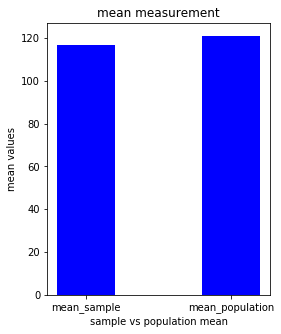

In [159]:
#creating the bar graph for sample vs population mean 
# the graph clearly shows that mean_population is slightly higher on copmaring with mean_sample

mean_values = list(dict_mean.keys())
values = list(dict_mean.values())
  
fig = plt.figure(figsize = (4, 5))
 
# creating the bar plot
plt.bar(mean_values, values, color ='blue',
        width = 0.4)
 
plt.xlabel("sample vs population mean")
plt.ylabel("mean values")
plt.title("mean measurement")


plt.savefig("/Users/aditya/Documents/My-files/Umkc/Spring/spring23/PDS/Project/Diabetes/Results/A/mean_barimage.jpeg")

plt.show()


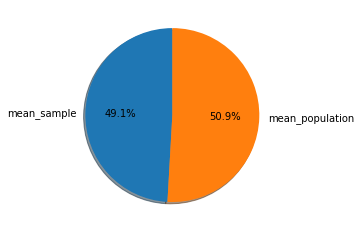

In [158]:
#creating the pie graph for sample vs population mean 
# the graph clearly shows that mean_population is slightly higher on comparing with mean_sample


plt.pie(values, labels = mean_values, autopct='%1.1f%%', shadow=True, startangle=90)
plt.savefig("/Users/aditya/Documents/My-files/Umkc/Spring/spring23/PDS/Project/Diabetes/Results/A/mean_pieimage.jpeg")



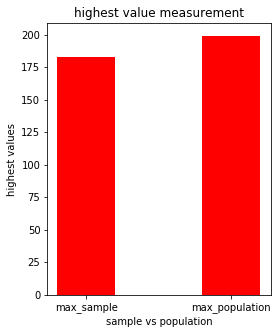

In [160]:
#creating the bar graph for sample vs population max 
#the graph clearly shows that max_population is higher on comparing with max_sample


max_values = list(dict_max.keys())
values = list(dict_max.values())
  
fig = plt.figure(figsize = (4, 5))
 
# creating the bar plot
plt.bar(max_values, values, color ='red',
        width = 0.4)
 
plt.xlabel("sample vs population")
plt.ylabel("highest values")
plt.title("highest value measurement")

plt.savefig("/Users/aditya/Documents/My-files/Umkc/Spring/spring23/PDS/Project/Diabetes/Results/A/max_barimage.jpeg")



plt.show()

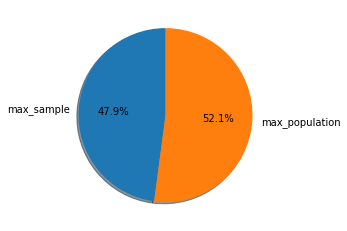

In [161]:
#creating the pie graph for sample vs population max 
#the graph clearly shows that max_population is higher on comparing with max_sample


plt.pie(values, labels = max_values , autopct='%1.1f%%', shadow=True, startangle=90)
plt.savefig("/Users/aditya/Documents/My-files/Umkc/Spring/spring23/PDS/Project/Diabetes/Results/A/max_pieimage.jpeg")



In [108]:
#let us now find the 98th percentile of sample data

sample_percentile = np.percentile(df_getsample_frompopulation.loc[:,"BMI"], 98)
print(sample_percentile)

40.248


In [109]:
#find the 98th percentile of population data

population_percentile = np.percentile(df_raw.loc[:,"BMI"], 98)
print(population_percentile)

47.52599999999996


In [162]:
# let us create a dictonary which stores the percentile values of sample and population 
# which helps in plotting the graphs


class percentile_dictionary(dict):
    
    def __init__(self):
        self = dict()
    
    def add(self, key, value):
        self[key] = value
 
 
# Main Function
dict_percentile = percentile_dictionary()
 
dict_percentile.add('sample_percentile', sample_percentile)
dict_percentile.add('population_percentile', population_percentile)
 
print(dict_percentile)


## Saving the results into results folder

result_save = open("/Users/aditya/Documents/My-files/Umkc/Spring/spring23/PDS/Project/Diabetes/Results/B/dict_percentile.txt","w")

# write file
result_save.write(str(dict_percentile))

# close file
result_save.close()


{'sample_percentile': 40.248, 'population_percentile': 47.52599999999996}


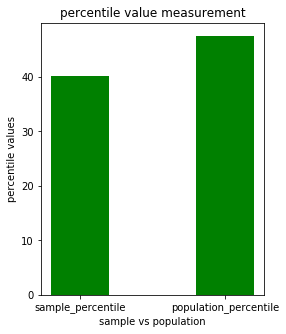

In [163]:
#creating the bar graph for sample vs population percentile 
#the graph clearly shows that population_percentile is higher on comparing with sample_percentile


percentile_values = list(dict_percentile.keys())
values = list(dict_percentile.values())
  
fig = plt.figure(figsize = (4, 5))
 
# creating the bar plot
plt.bar(percentile_values, values, color ='green',
        width = 0.4)
 
plt.xlabel("sample vs population")
plt.ylabel("percentile values")
plt.title("percentile value measurement")

plt.savefig("/Users/aditya/Documents/My-files/Umkc/Spring/spring23/PDS/Project/Diabetes/Results/B/percentile_barimage.jpeg")


plt.show()

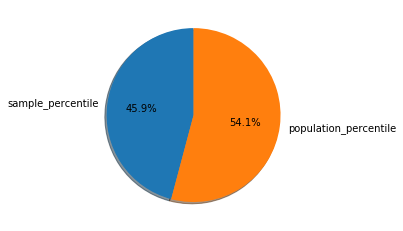

In [164]:
#creating the pie graph for sample vs population percentile 
#the graph clearly shows that population_percentile is higher on comparing with sample_percentile


plt.pie(values, labels = percentile_values , autopct='%1.1f%%', shadow=True, startangle=90)
plt.savefig("/Users/aditya/Documents/My-files/Umkc/Spring/spring23/PDS/Project/Diabetes/Results/B/percentile_pieimage.jpeg")



In [112]:
#Using bootstrap (replace= True), created 500 samples (of 150 observation each) from the population(raw_data) 

boot = sk.utils.resample(df_raw, replace=True, n_samples=500, random_state=150)

print(boot)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
228            4      197             70             39      744  36.7   
442            4      117             64             27      120  33.2   
507            1      130             60             23      170  28.6   
25            10      125             70             26      115  31.1   
496            5      110             68              0        0  26.0   
..           ...      ...            ...            ...      ...   ...   
732            2      174             88             37      120  44.5   
514            3       99             54             19       86  25.6   
750            4      136             70              0        0  31.2   
364            4      147             74             25      293  34.9   
485            0      135             68             42      250  42.3   

     DiabetesPedigreeFunction  Age  Outcome  
228                     2.329   31        0  
442                

In [113]:
#find the mean BMI of the bootstrapsample

mean_bootBMI = mean(boot.loc[:,"BMI"])
print(mean_bootBMI)

31.8188


In [114]:
#find the std BMI of the bootstrapsample

std_bootBMI = st.stdev(boot.loc[:,"BMI"])
print(std_bootBMI)

8.058660594736716


In [115]:
#find the percentile BMI of the bootstrapsample

percentile_bootBMI = np.percentile(boot.loc[:,"BMI"], 98)
print(percentile_bootBMI)

46.50599999999999


In [116]:
#find the mean BMI of the population

mean_rawBMI = mean(df_raw.loc[:,"BMI"])
print(mean_rawBMI)

31.992578125


In [117]:
#find the std BMI of the population

std_rawBMI = st.stdev(df_raw.loc[:,"BMI"])
print(std_rawBMI)

7.884160320375446


In [119]:
#find the percentile BMI of the population

percentile_rawBMI = np.percentile(df_raw.loc[:,"BMI"], 98)
print(percentile_rawBMI)

47.52599999999996


In [165]:
# let us create a dictonary which stores the mean values of sample and population 
# which helps in plotting the graphs



class Bootmean_dictionary(dict):
    
    def __init__(self):
        self = dict()
    
    def add(self, key, value):
        self[key] = value
 
 
# Main Function
dict_Bootmean = Bootmean_dictionary()
 
dict_Bootmean.add('mean_Bootsample', mean_bootBMI)
dict_Bootmean.add('mean_population', mean_rawBMI)
 
print(dict_Bootmean)

## Saving the results into results folder

result_save = open("/Users/aditya/Documents/My-files/Umkc/Spring/spring23/PDS/Project/Diabetes/Results/C/dict_Bootmean.txt","w")

# write file
result_save.write(str(dict_Bootmean))

# close file
result_save.close()



{'mean_Bootsample': 31.8188, 'mean_population': 31.992578125}


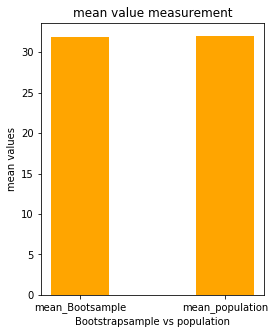

In [166]:
#creating the bar graph for sample vs population mean
#the graph clearly shows that population is higher on comparing with sample


Bootmean_values = list(dict_Bootmean.keys())
values = list(dict_Bootmean.values())
  
fig = plt.figure(figsize = (4, 5))
 
# creating the bar plot
plt.bar(Bootmean_values, values, color ='orange',
        width = 0.4)
 
plt.xlabel("Bootstrapsample vs population")
plt.ylabel("mean values")
plt.title("mean value measurement")

plt.savefig("/Users/aditya/Documents/My-files/Umkc/Spring/spring23/PDS/Project/Diabetes/Results/C/bootmean_barimage.jpeg")


plt.show()

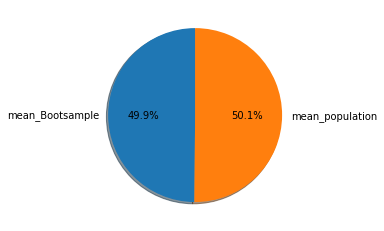

In [167]:
#creating the pie graph for sample vs population mean
#the graph clearly shows that population is higher on comparing with sample

plt.pie(values, labels = Bootmean_values, autopct='%1.1f%%', shadow=True, startangle=90)
plt.savefig("/Users/aditya/Documents/My-files/Umkc/Spring/spring23/PDS/Project/Diabetes/Results/C/bootmean_pieimage.jpeg")


In [168]:
# let us create a dictonary which stores the std values of sample and population 
# which helps in plotting the graphs




class Bootstd_dictionary(dict):
    
    def __init__(self):
        self = dict()
    
    def add(self, key, value):
        self[key] = value
 
 
# Main Function
dict_Bootstd = Bootstd_dictionary()
 
dict_Bootstd.add('std_Bootsample', std_bootBMI)
dict_Bootstd.add('std_population', std_rawBMI)
 
print(dict_Bootstd)

## Saving the results into results folder

result_save = open("/Users/aditya/Documents/My-files/Umkc/Spring/spring23/PDS/Project/Diabetes/Results/C/dict_Bootstd.txt","w")

# write file
result_save.write(str(dict_Bootstd))

# close file
result_save.close()


{'std_Bootsample': 8.058660594736716, 'std_population': 7.884160320375446}


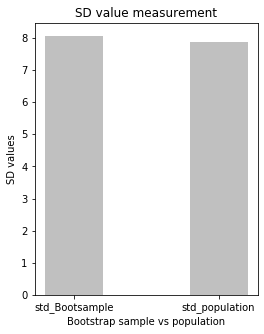

In [170]:
#creating the bar graph for sample vs population std
#the graph clearly shows that population is slightly higher on comparing with sample

Bootstd_values = list(dict_Bootstd.keys())
values = list(dict_Bootstd.values())
  
fig = plt.figure(figsize = (4, 5))
 
# creating the bar plot
plt.bar(Bootstd_values, values, color ='silver',
        width = 0.4)
 
plt.xlabel("Bootstrap sample vs population")
plt.ylabel("SD values")
plt.title("SD value measurement")

plt.savefig("/Users/aditya/Documents/My-files/Umkc/Spring/spring23/PDS/Project/Diabetes/Results/C/bootstd_barimage.jpeg")


plt.show()

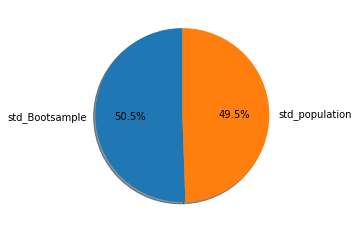

In [171]:
#creating the pie graph for sample vs population std
#the graph clearly shows that population is slightly higher on comparing with sample

plt.pie(values, labels = Bootstd_values , autopct='%1.1f%%', shadow=True, startangle=90)
plt.savefig("/Users/aditya/Documents/My-files/Umkc/Spring/spring23/PDS/Project/Diabetes/Results/C/bootstd_pieimage.jpeg")


In [172]:
# let us create a dictonary which stores the percentile values of sample and population 
# which helps in plotting the graphs


class Bootpercentile_dictionary(dict):
    
    def __init__(self):
        self = dict()
    
    def add(self, key, value):
        self[key] = value
 
 
# Main Function
dict_Bootpercentile = Bootpercentile_dictionary()
 
dict_Bootpercentile.add('percentile_Bootsample', percentile_bootBMI)
dict_Bootpercentile.add('percentile_population', percentile_rawBMI)
 
print(dict_Bootpercentile)

## Saving the results into results folder

result_save = open("/Users/aditya/Documents/My-files/Umkc/Spring/spring23/PDS/Project/Diabetes/Results/C/dict_Bootpercentile.txt","w")

# write file
result_save.write(str(dict_Bootstd))

# close file
result_save.close()




{'percentile_Bootsample': 46.50599999999999, 'percentile_population': 47.52599999999996}


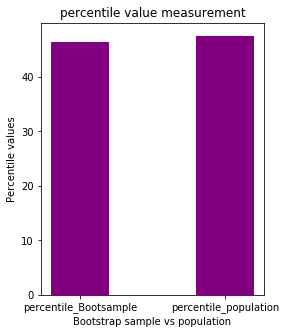

In [173]:
#creating the bar graph for sample vs population percentile
#the graph clearly shows that population is slightly higher on comparing with sample

Bootpercentile_values = list(dict_Bootpercentile.keys())
values = list(dict_Bootpercentile.values())
  
fig = plt.figure(figsize = (4, 5))
 
# creating the bar plot
plt.bar(Bootpercentile_values, values, color ='purple',
        width = 0.4)
 
plt.xlabel("Bootstrap sample vs population")
plt.ylabel("Percentile values")
plt.title("percentile value measurement")

plt.savefig("/Users/aditya/Documents/My-files/Umkc/Spring/spring23/PDS/Project/Diabetes/Results/C/bootpercentile_barimage.jpeg")


plt.show()

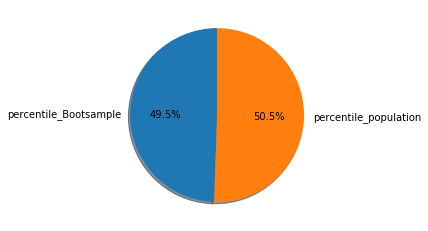

In [174]:
#creating the bar graph for sample vs population percentile
#the graph clearly shows that population is slightly higher on comparing with sample

plt.pie(values, labels = Bootpercentile_values, autopct='%1.1f%%', shadow=True, startangle=90)
plt.savefig("/Users/aditya/Documents/My-files/Umkc/Spring/spring23/PDS/Project/Diabetes/Results/C/bootpercentile_barimage.jpeg")
